# Proyek Analisis Data: Nama dataset
- Nama: Dimas Zuda Fathul Akhir
- Email: dimas.zuda45@gmail.com
- Id Dicoding: NVP79RVNVZR0

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : apa musim atau season yang memiliki jumlah penyewa sepeda terbanyak?
- pertanyaan 2 : bagaimana jumlah penyewa sepeda pada hari libur atau akhir pekan dibanding dengan hari kerja
- pertanyaan 3 : Bagaimana kondisi cuaca memengaruhi jumlah penyewa sepeda?

## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
df = pd.read_csv("day.csv", delimiter=',')

### Assessing Data

In [34]:
df['weathersit'].unique().sum()

6

#### identify null value

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### identify duplicated value

In [5]:
df.duplicated().sum()

0

#### filter columns to choose columns needed

In [6]:
df_filtered = df[['instant', 'season', 'workingday', 'weathersit', 'cnt']]

In [7]:
df_filtered.head()

,instant,season,workingday,weathersit,cnt
0,1,1,0,2,985
1,2,1,0,2,801
2,3,1,1,1,1349
3,4,1,1,1,1562
4,5,1,1,1,1600


### Cleaning Data

#### drop null value

In [8]:
df_filtered = df_filtered.dropna()

#### drop duplicated value

In [9]:
df_filtered = df_filtered.drop_duplicates()

## Exploratory Data Analysis (EDA)

### Explore ...

#### explore statistic parameter

In [10]:
df_filtered.describe(include='all')

,instant,season,workingday,weathersit,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.683995,1.395349,4504.348837
std,211.165812,1.110807,0.465233,0.544894,1937.211452
min,1.000000,1.000000,0.000000,1.000000,22.000000
25%,183.500000,2.000000,0.000000,1.000000,3152.000000
50%,366.000000,3.000000,1.000000,1.000000,4548.000000
75%,548.500000,3.000000,1.000000,2.000000,5956.000000
max,731.000000,4.000000,1.000000,3.000000,8714.000000


#### explore correlation among variables

In [11]:
correlation = df_filtered.corr()

In [12]:
correlation

,instant,season,workingday,weathersit,cnt
instant,1.000000,0.412224,-0.004337,-0.021477,0.628830
season,0.412224,1.000000,0.012485,0.019211,0.406100
workingday,-0.004337,0.012485,1.000000,0.061200,0.061156
weathersit,-0.021477,0.019211,0.061200,1.000000,-0.297391
cnt,0.628830,0.406100,0.061156,-0.297391,1.000000


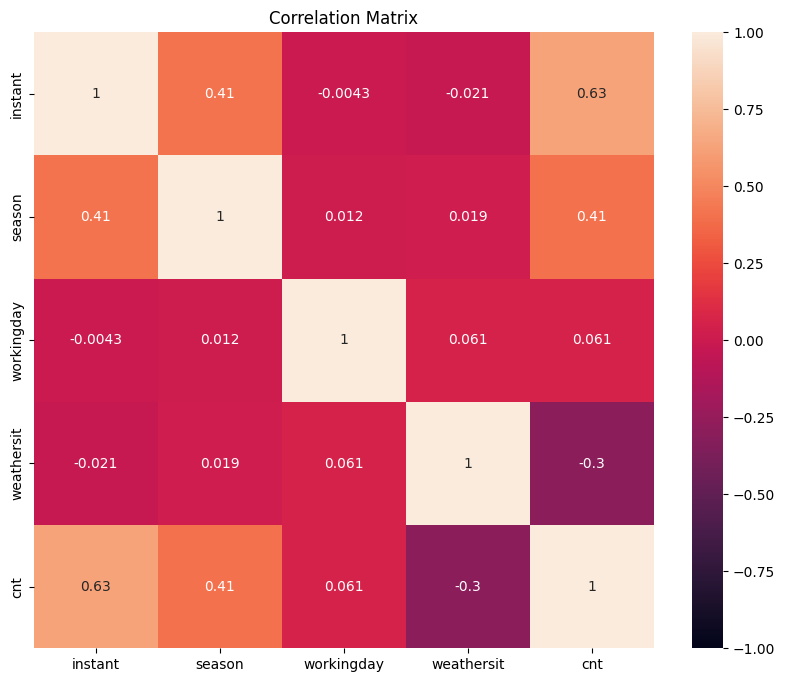

In [13]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Matrix')
plt.show()

#### plot histogram of dataset

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

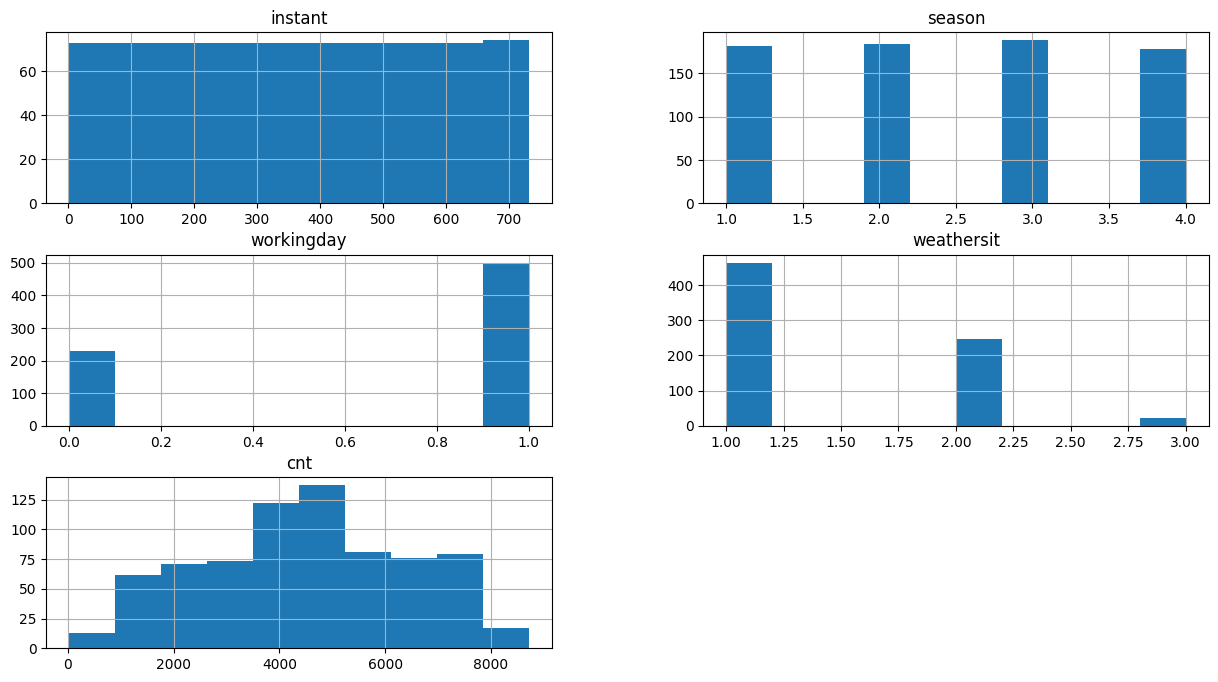

In [14]:
df_filtered.hist(figsize=(15, 8))

## Visualization & Explanatory Analysis

### Pertanyaan 1: apa musim atau season yang memiliki jumlah penyewa sepeda terbanyak?

##### memisahkan dataframe berdasarkan musim

In [15]:
plt.style.use("ggplot")

#### identify indices of season

In [16]:
indices_season = []
indices_prev_season, prev_season = 0, 1
for i, season in enumerate(df['season']):
    if season != prev_season:
        indices_season.append([indices_prev_season, i])
        prev_season = season
        indices_prev_season = i+1

print(indices_season)

[[0, 79], [80, 171], [172, 265], [266, 354], [355, 445], [446, 537], [538, 631], [632, 720]]


#### sum total tenant each season

In [17]:
springer = df[df['season'] == 1]
summer = df[df['season'] == 2]
fall = df[df['season'] == 3]
winter = df[df['season'] == 4]

In [18]:
total_tenant = [springer['cnt'].sum(), summer['cnt'].sum(), fall['cnt'].sum(),  winter['cnt'].sum()]

#### generate timeseries of total of bike tenant

In [19]:
tenant = df['cnt']
window_size = 30

i = 0

moving_averages = []

while i < len(tenant) - window_size + 1:
  window_average = round(np.sum(tenant[
      i:i+window_size]) / window_size, 2
  )

  moving_averages.append(window_average)

  i += 1

#### membuat visualisasi

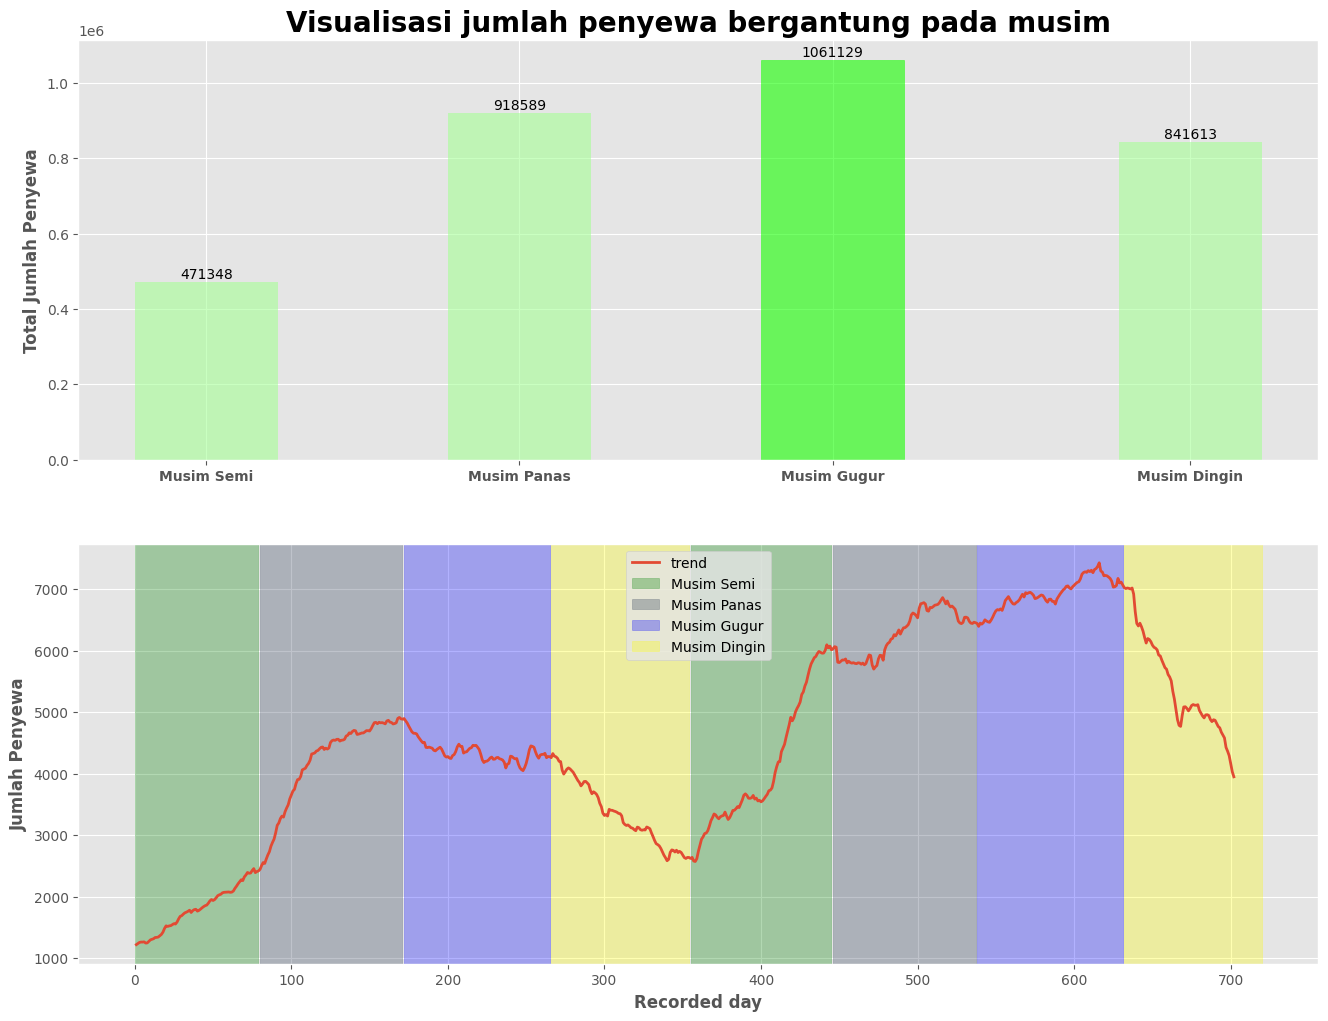

In [20]:
legend = ['trend', 'Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
season = ['Musim Semi', 'Musim Panas', 'Musim Gugur', 'Musim Dingin']
seasonCode = [125, 300, 475, 675]

fig, ax = plt.subplots(2, 1, figsize=(16, 12))

bars = ax[0].bar(seasonCode, total_tenant, width=80, color='#A6FF96', alpha=0.6)
ax[0].set_title("Visualisasi jumlah penyewa bergantung pada musim", fontsize=20, fontweight='bold')
ax[0].set_ylabel("Total Jumlah Penyewa", fontweight='bold')
ax[0].set_xticks(seasonCode)
ax[0].set_xticklabels(season, fontweight='bold')
max_index = total_tenant.index(max(total_tenant))
bars[max_index].set_color('#16FF00')
for bar in bars:
  height = bar.get_height()
  ax[0].annotate(f'{int(height)}',
      xy=(bar.get_x() + bar.get_width() / 2, height-9000),
      xytext=(0, 3),
      textcoords="offset points",
      ha='center', va='bottom')

ax[1].plot(df['instant'][0:len(moving_averages)], moving_averages, linewidth=2)
ax[1].set_xlabel("Recorded day", fontweight='bold')
ax[1].set_ylabel("Jumlah Penyewa", fontweight='bold')

colors = ['green', '#2B3A55', 'blue', 'yellow']
c = 0
for val in indices_season:
  i, j = val
  color = colors[c]
  ax[1].axvspan(i, j, color=color, alpha=0.3)
  if color == "yellow":
      c = -1
  c += 1

plt.legend(legend, loc='upper center')
plt.show()

### Pertanyaan 2: bagaimana jumlah penyewa sepeda pada hari libur atau akhir pekan dibanding dengan hari kerja

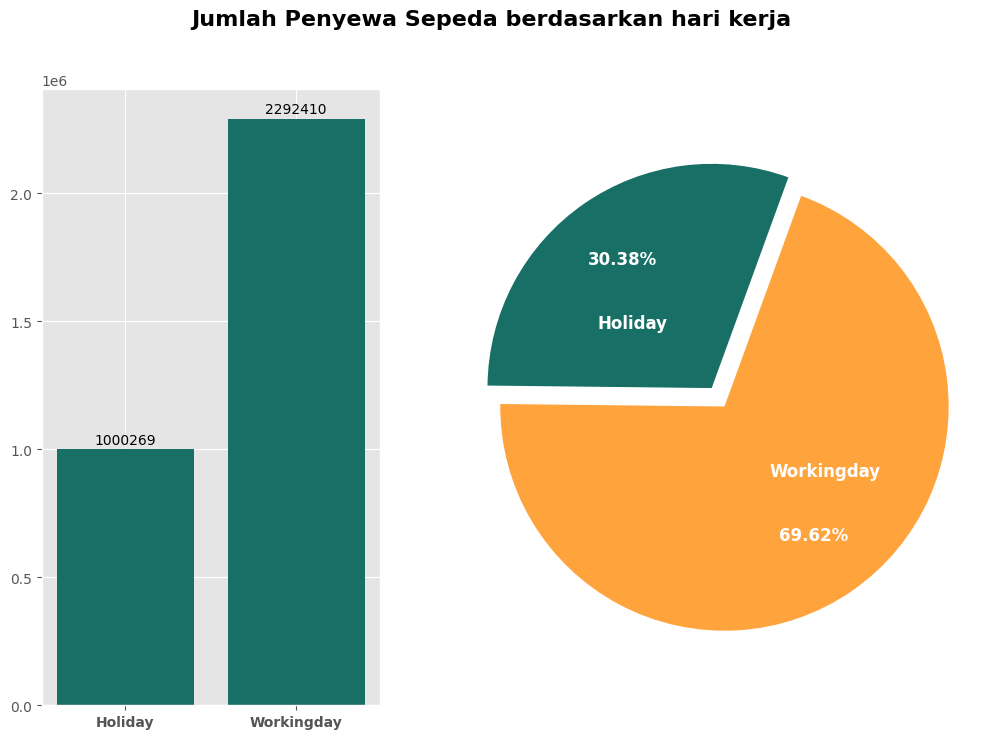

In [42]:
pie_result = df.groupby('workingday')['cnt'].sum().tolist()
day = [0, 1]
dayCode = ['Holiday', 'Workingday']

fig, ax = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [2, 3]})
bars = ax[0].bar(day, pie_result, color='#186F65')
ax[0].set_xticks(day)
ax[0].set_xticklabels(dayCode, fontweight='bold')


for bar in bars:
  height = bar.get_height()
  ax[0].annotate(f'{int(height)}',
      xy=(bar.get_x() + bar.get_width() / 2, height-9000),
      xytext=(0, 3),
      textcoords="offset points",
      ha='center', va='bottom')

explode = (0, 0.1)

pie_result, texts, autotexts = ax[1].pie(
    pie_result,
    labels=dayCode,
    autopct='%1.2f%%',
    colors=['#186F65', '#FFA33C'],
    explode=explode,
    startangle=70,
    labeldistance=0.35,
    pctdistance=0.7)

for t in texts:
    t.set_fontsize(12)
    t.set_color('white')
    t.set_fontweight('bold')

for text in autotexts:
  text.set_fontsize(12)
  text.set_color('white')
  text.set_fontweight('bold')

plt.axis('equal')

fig.suptitle('Jumlah Penyewa Sepeda berdasarkan hari kerja', fontsize=16, fontweight='bold')
plt.show()


### Pertanyaan 3: Bagaimana kondisi cuaca memengaruhi jumlah penyewa sepeda?

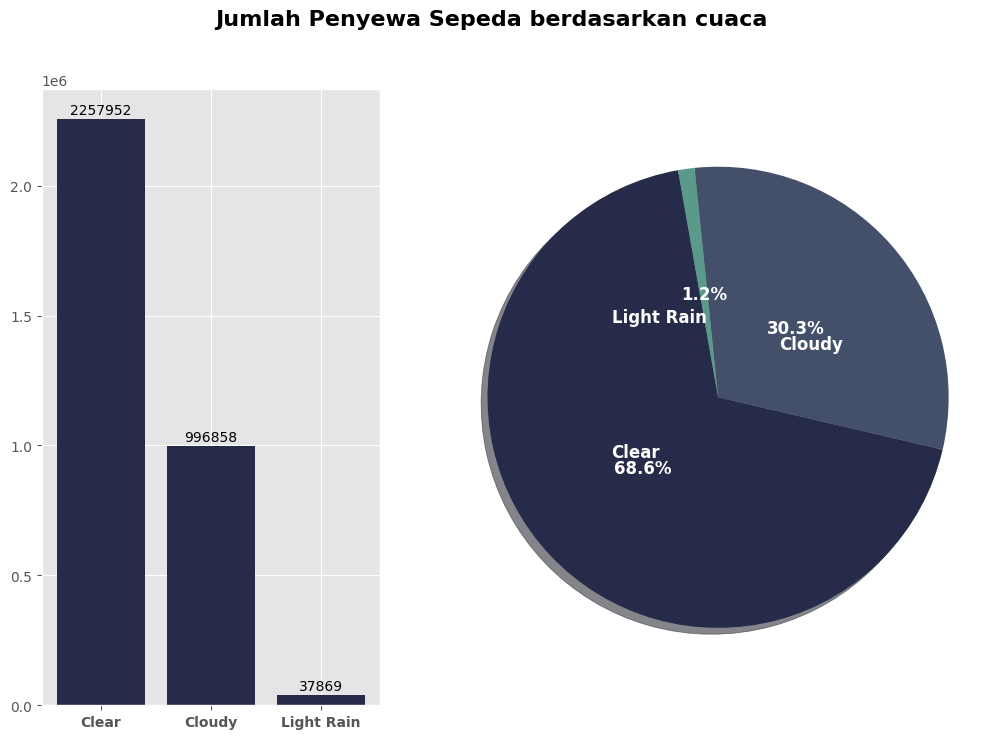

In [66]:
sumWeather = df.groupby('weathersit')['cnt'].sum().tolist()
weather = [1, 2, 3]
weatherCode = ['Clear', 'Cloudy', 'Light Rain']

fig, ax = plt.subplots(1, 2, figsize=(12, 8), width_ratios={2, 3})
bars = ax[0].bar(weather, sumWeather, color='#252B48')
ax[0].set_xticks(weather)
ax[0].set_xticklabels(weatherCode, fontweight='bold')
for bar in bars:
  height = bar.get_height()
  ax[0].annotate(f'{int(height)}',
      xy=(bar.get_x() + bar.get_width() / 2, height-9000),
      xytext=(0, 3),
      textcoords="offset points",
      ha='center', va='bottom')

pie, texts, autotexts = ax[1].pie(
    sumWeather,
    labels=weatherCode,
    autopct='%1.1f%%',
    colors=['#252B48', '#445069', '#5B9A8B'],
    shadow = True,
    startangle=100,
    labeldistance=0.35,
    pctdistance=0.45)

for t in texts:
    t.set_fontsize(12)
    t.set_color('white')
    t.set_fontweight('bold')

for text in autotexts:
  text.set_fontsize(12)
  text.set_color('white')
  text.set_fontweight('bold')

plt.axis('equal')
fig.suptitle('Jumlah Penyewa Sepeda berdasarkan cuaca', fontsize=16, fontweight='bold')
plt.show()

## Conclusion

- Conclution pertanyaan 1 = Jumlah Penyewa paling banyak terjadi pada musim gugur dengan jumlah penyewa 1061129 dan Jumlah penyewa paling sedikit terjadii pada musim semi dengan jumlah penyewa hanya berjumlah 471348
- conclution pertanyaan 2 = Sepeda lebih banyak disewa pada hari kerja daripada hari libur dengan perbandingan 3:7
- conclution pertanyaan 3 = Jumlah penyewa paling banyak terjadi pada saat cuaca sedang cerah sedangkan paling sedikit terjadi pada saat hujan. Ini menandakan bahwa cuaca sangat memengaruhi jumlah penyewa sepeda.
